In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from datetime import datetime
from sqlalchemy import create_engine
# import time 
# from sqlalchemy import create_engine

In [2]:
# File to Load
# Read csv file
data1 = pd.read_csv("data/date-hour-soo-dest-2016.csv")
data2 = pd.read_csv("data/date-hour-soo-dest-2017.csv")
station_info = pd.read_csv("data/station_info.csv")
# Read csv file
# data1.head(10)
# data2.head(10)
# data1.count
# data2.count


In [3]:
#2016 data

# #convert to datetime
data1["DateTime"] = pd.to_datetime(data1["DateTime"])

# #groupby to aggregate throughput per origin, destination, and date time
grouped1 = data1.groupby(['Origin','Destination','DateTime']).sum().reset_index()

# #rename column to station
data1_grouped = grouped1.rename(columns={"Origin":"Station"})

# #Combine number of throughput of each station origin
origin1 = data1_grouped.groupby(["Station","DateTime"]).sum().reset_index()

# #rDestination throughput
Destination1 = grouped1[['Destination','DateTime','Throughput']]

# #rename column to station
Des_df1 = Destination1.rename(columns={"Destination":"Station"})

# #Combine number of throughput of each station destination
Des1 = Des_df1.groupby(["Station","DateTime"]).sum().reset_index()

#merge the two columns (Origin and Destination)
merged1 = pd.merge(origin1,Des1, on=["Station","DateTime"], how="outer")

#Rename thoughput
new1 = merged1.rename(columns={"Throughput_x":"Origin", "Throughput_y":"Destination"})

#Columns for day, hour
new1["Day"]=new1['DateTime'].map(lambda x: x.weekday())
new1["Month"]=new1['DateTime'].map(lambda x: x.month)
new1["Hour"]=new1['DateTime'].map(lambda x: x.hour)
new1["Year"]=new1['DateTime'].map(lambda x: x.year)
weekdays={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
new1["Day"] = new1["Day"].map(weekdays)
Final_df1 = pd.DataFrame(new1).set_index("Station").fillna(0).sort_values(by=["Station","DateTime"])

# Final_df1
Final_df1.head()

,DateTime,Origin,Destination,Day,Month,Hour,Year
Station,,,,,,,
12TH,2016-01-01 00:00:00,118.0,129.0,Friday,1,0,2016
12TH,2016-01-01 01:00:00,270.0,362.0,Friday,1,1,2016
12TH,2016-01-01 02:00:00,281.0,199.0,Friday,1,2,2016
12TH,2016-01-01 03:00:00,85.0,105.0,Friday,1,3,2016
12TH,2016-01-01 04:00:00,5.0,0.0,Friday,1,4,2016


In [4]:
#2017

#convert to datetime
data2["DateTime"] = pd.to_datetime(data2["DateTime"])

#groupby to aggregate throughput per origin, destination, and date time
grouped2 = data2.groupby(['Origin','Destination','DateTime']).sum().reset_index()

#rename column to station
data2_grouped = grouped2.rename(columns={"Origin":"Station"})

#Combine number of throughput of each station origin
origin2 = data2_grouped.groupby(["Station","DateTime"]).sum().reset_index()

#rDestination throughput
Destination2 = grouped2[['Destination','DateTime','Throughput']]

#rename column to station
Des_df2 = Destination2.rename(columns={"Destination":"Station"})

#Combine number of throughput of each station destination
Des2 = Des_df2.groupby(["Station","DateTime"]).sum().reset_index()

#merge the two columns (Origin and Destination)
merged2 = pd.merge(origin2,Des2, on=["Station","DateTime"], how="outer")

#Rename thoughput
new2 = merged2.rename(columns={"Throughput_x":"Origin", "Throughput_y":"Destination"})

#Columns for day, hour
new2["Day"]=new2['DateTime'].map(lambda x: x.weekday())
new2["Month"]=new2['DateTime'].map(lambda x: x.month)
new2["Hour"]=new2['DateTime'].map(lambda x: x.hour)
new2["Year"]=new2['DateTime'].map(lambda x: x.year)
weekdays={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
new2["Day"] = new2["Day"].map(weekdays)
Final_df2 = pd.DataFrame(new2).set_index("Station").fillna(0).sort_values(by=["Station","DateTime"])


Final_df2.head()

,DateTime,Origin,Destination,Day,Month,Hour,Year
Station,,,,,,,
12TH,2017-01-01 00:00:00,65.0,48.0,Sunday,1,0,2017
12TH,2017-01-01 01:00:00,151.0,333.0,Sunday,1,1,2017
12TH,2017-01-01 02:00:00,133.0,185.0,Sunday,1,2,2017
12TH,2017-01-01 03:00:00,28.0,77.0,Sunday,1,3,2017
12TH,2017-01-01 04:00:00,4.0,1.0,Sunday,1,4,2017


In [5]:
merged_final= Final_df1.append(Final_df2)
# merged_final.head(10)


In [6]:
station_info.head(10)

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH)
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH)
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH)
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB)
5,BALB,"401 Geneva Avenue, San Francisco CA 94112<br /...","-122.447506,37.721585,0",Balboa Park (BALB)
6,BAYF,"15242 Hesperian Blvd., San Leandro CA 94578<br...","-122.126514,37.696924,0",Bay Fair (BAYF)
7,CAST,"3301 Norbridge Dr., Castro Valley CA 94546<br ...","-122.075602,37.690746,0",Castro Valley (CAST)
8,CIVC,"1150 Market Street, San Francisco CA 94102<br ...","-122.414123,37.779732,0",Civic Center/UN Plaza (CIVC)
9,COLS,"7200 San Leandro St., Oakland CA 94621<br />We...","-122.196869,37.753661,0",Coliseum/Oakland Airport (COLS)


In [7]:
station_renamed = station_info.rename(columns={"Abbreviation":"Station", "Location":"Coordinates"})
station_df = station_renamed[["Station","Coordinates"]].replace({"WARM":"WSPR"})
# station_df["Station"].unique()

In [8]:
merged_location = merged_final.merge(station_df, on='Station',how='left')
merged_loc = merged_location["Coordinates"].str.split(',', expand=True).rename(columns={0:'Latitude',1:'Longitude'})
merged_location["Latitude"] = merged_loc["Latitude"]
merged_location["Longitude"] = merged_loc["Longitude"]

final_dataset = merged_location[["Station", "DateTime", "Destination", "Origin", "Year","Day", "Hour", "Latitude", "Longitude"]].set_index("DateTime")

final_dataset.tail()


,Station,Destination,Origin,Year,Day,Hour,Latitude,Longitude
DateTime,,,,,,,,
2017-05-03 19:00:00,WSPR,305.0,125.0,2017,Wednesday,19,-121.939313,37.502171
2017-05-03 20:00:00,WSPR,116.0,50.0,2017,Wednesday,20,-121.939313,37.502171
2017-05-03 21:00:00,WSPR,110.0,23.0,2017,Wednesday,21,-121.939313,37.502171
2017-05-03 22:00:00,WSPR,80.0,33.0,2017,Wednesday,22,-121.939313,37.502171
2017-05-03 23:00:00,WSPR,50.0,35.0,2017,Wednesday,23,-121.939313,37.502171


In [9]:
final_dataset.to_csv("data/FinalDataset.csv")

In [10]:
final_dataset_2017=final_dataset[final_dataset["Year"]==2017]
final_dataset_2017.tail()

,Station,Destination,Origin,Year,Day,Hour,Latitude,Longitude
DateTime,,,,,,,,
2017-05-03 19:00:00,WSPR,305.0,125.0,2017,Wednesday,19,-121.939313,37.502171
2017-05-03 20:00:00,WSPR,116.0,50.0,2017,Wednesday,20,-121.939313,37.502171
2017-05-03 21:00:00,WSPR,110.0,23.0,2017,Wednesday,21,-121.939313,37.502171
2017-05-03 22:00:00,WSPR,80.0,33.0,2017,Wednesday,22,-121.939313,37.502171
2017-05-03 23:00:00,WSPR,50.0,35.0,2017,Wednesday,23,-121.939313,37.502171


In [11]:
final_dataset.to_csv("data/FinalDataset_2017.csv")

# Per station trend (Origin)

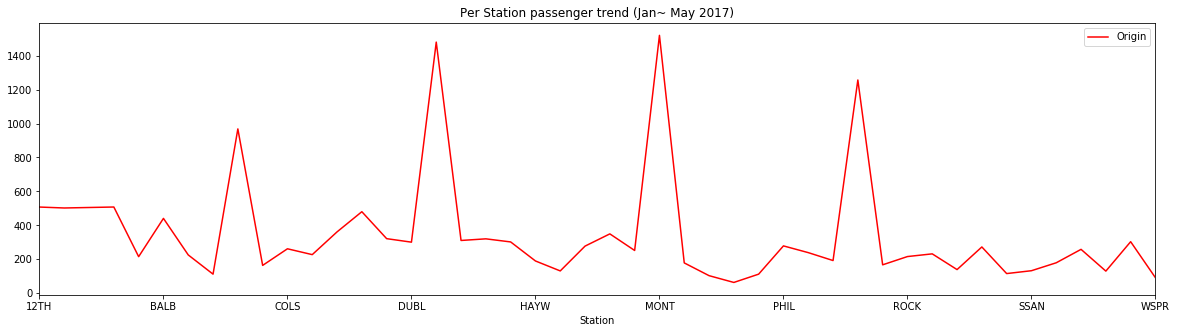

In [12]:
import pandas as pd


per_station = final_dataset_2017.groupby(["Station"]).mean()["Origin"]
per_station.head()

per_station.plot(kind='line',x='Station',y='Origin',color='red',figsize=(20,5))
plt.title("Per Station passenger trend (Jan~ May 2017)")
plt.legend(loc="best")
plt.savefig('images/per_station.png')


# Hourly trend for Embarcadero

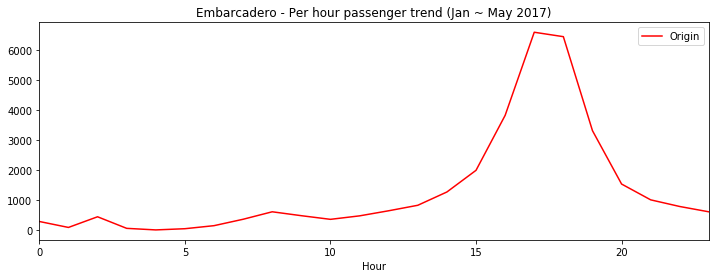

In [13]:
import pandas as pd

EMB= final_dataset_2017[final_dataset_2017['Station']=='EMBR']
per_hour_EMB = EMB.groupby(["Hour"]).mean()["Origin"]
per_hour_EMB.head()


per_hour_EMB.plot(kind='line',x='Hour',y='Origin',color='red',figsize=(12,4))
plt.title("Embarcadero - Per hour passenger trend (Jan ~ May 2017)")
plt.legend(loc="best")
plt.savefig('images/EMBR_actual_hourly.png')

# Hourly trend for SFO

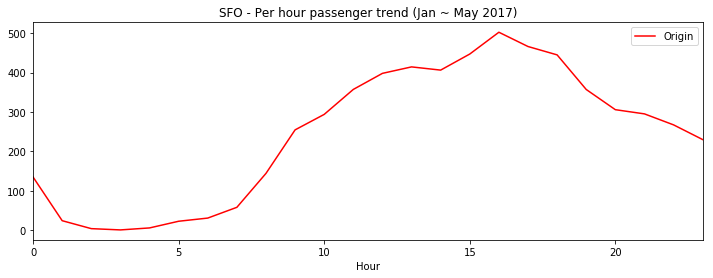

In [14]:
SFO= final_dataset_2017[final_dataset_2017['Station']=='SFIA']
per_hour_SFO = SFO.groupby(["Hour"]).mean()["Origin"]
per_hour_SFO.head()


per_hour_SFO.plot(kind='line',x='Hour',y='Origin',color='red',figsize=(12,4))
plt.title("SFO - Per hour passenger trend (Jan ~ May 2017)")
plt.legend(loc="best")
plt.savefig('images/SFIA_actual_hourly.png')

# Hourly trend for Coliseum

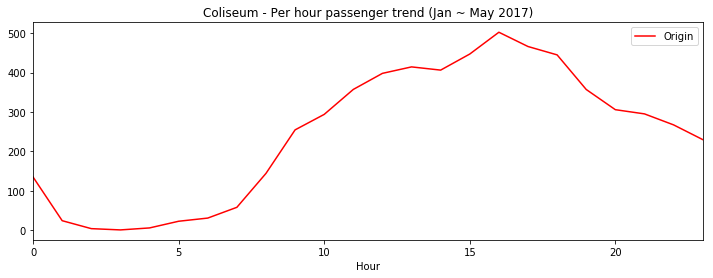

In [15]:
COL= final_dataset_2017[final_dataset_2017['Station']=='COLS']
per_hour_COL = SFO.groupby(["Hour"]).mean()["Origin"]
per_hour_COL.head()


per_hour_COL.plot(kind='line',x='Hour',y='Origin',color='red',figsize=(12,4))
plt.title("Coliseum - Per hour passenger trend (Jan ~ May 2017)")
plt.legend(loc="best")
plt.savefig('images/COLS_actual_hourly.png')

# Daily trend for Embarcadero

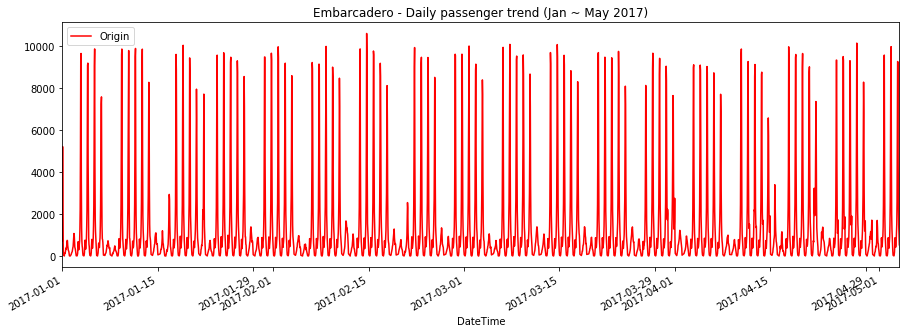

In [16]:
EMB= final_dataset_2017[final_dataset_2017['Station']=='EMBR']
daily_EMB = EMB.groupby(["DateTime"]).mean()["Origin"]
daily_EMB.head()


daily_EMB.plot(color='red',figsize=(15,5))
plt.title("Embarcadero - Daily passenger trend (Jan ~ May 2017)")
plt.legend(loc="best")
plt.savefig('images/EMBR_actual_daily.png')

# Daily trend for SFO

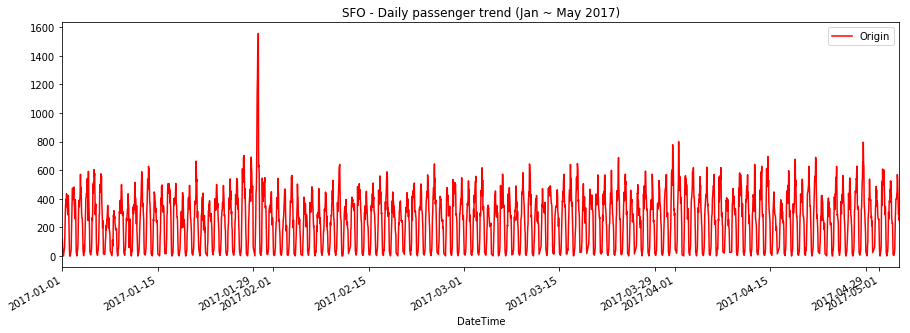

In [17]:
SFO= final_dataset_2017[final_dataset_2017['Station']=='SFIA']
daily_SFO = SFO.groupby(["DateTime"]).mean()["Origin"]
daily_SFO.head()


daily_SFO.plot(color='red',figsize=(15,5))
plt.title("SFO - Daily passenger trend (Jan ~ May 2017)")
plt.legend(loc="best")
plt.savefig('images/SFO_actual_daily.png')

# Daily trend for Coliseum

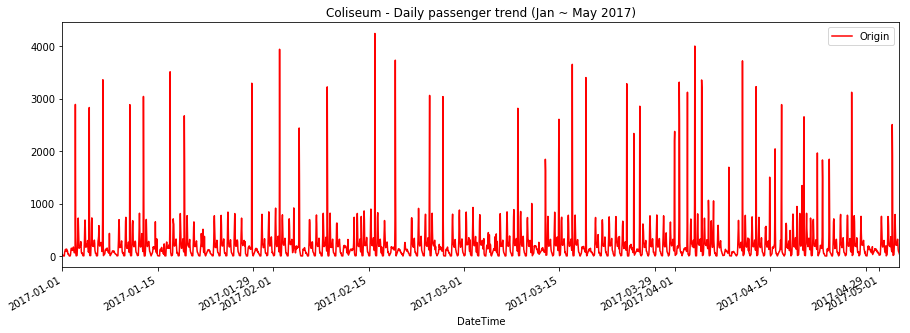

In [18]:
COL= final_dataset_2017[final_dataset_2017['Station']=='COLS']
daily_COL = COL.groupby(["DateTime"]).mean()["Origin"]
daily_COL.head()


daily_COL.plot(color='red',figsize=(15,5))
plt.title("Coliseum - Daily passenger trend (Jan ~ May 2017)")
plt.legend(loc="best")
plt.savefig('images/Coliseum_actual_daily.png')

In [19]:
# csv_file = "./FinalDataset.csv"
# df = pd.read_csv(csv_file)
# df.head()

In [20]:
# #connection to sqlite
# connection_string = "FinalDataset.sqlite"
# engine = create_engine(f'sqlite:///{connection_string}') 


In [21]:
# engine.table_names()

In [22]:
# final_dataset.to_sql(name='bart_ride', con=engine, if_exists='append', index=True)

In [23]:
# query ="select * from bart_ride"

In [24]:
# query ="select Station from bart_ride"

In [25]:
# pd.read_sql_query(query, con=engine)